We need two things for generating coexpression proxies for a new species, single cell data and an orthology relationship. This template helps generate a coexpression network, but the orthology relationship will need to come from another existing tool. 

In [1]:
import pandas as pd
import scanpy as sc
import h5py
import CococoNet_reader
import numpy as np
import anndata


import Go_annotations
import seaborn as sns
import matplotlib.pyplot as plt
sc.settings.verbosity = 3  
sc.set_figure_params(facecolor = 'white', figsize = (10,8))

In [4]:
single_cell_h5py = h5py.File('/data/passala/Data_from_CoCoCoNet/single_cell_data/Ara_data.hdf5','r')
col_data = single_cell_h5py['coldata']
row_data = single_cell_h5py['rowdata']
embedding_data = single_cell_h5py['embedding']
normalized_counts = single_cell_h5py['normalized_counts']

row_data_decoded = []

for gene_name in row_data:
    row_data_decoded.append(gene_name[0].decode())

cell_type_number =[]
study_number = []
study_id = []
batch_cluster = []
meta_cluster = []
umap_coordinates = []

for cell_identity in col_data:
    cell_type_number.append(cell_identity[0])  
    study_number.append(cell_identity[1])
    study_id.append(cell_identity[2])
    batch_cluster.append(cell_identity[3])
    meta_cluster.append(cell_identity[4])

barcode_for_each_cell = [] 
for barcode in embedding_data:
    barcode_for_each_cell.append(barcode[2])
    current_umap_coordinates =[barcode[1],barcode[0]]
    umap_coordinates.append(current_umap_coordinates)

umap_coordinates = np.array(umap_coordinates)
umap_coordinates

obs_arabidop = pd.DataFrame(index = barcode_for_each_cell, data = list(zip(cell_type_number,study_number,batch_cluster, meta_cluster)), columns = ['Cell Type','Study Number','Batch Cluster','Meta Cluster'] )

vars_arabidop = pd.DataFrame(index = row_data_decoded)
single_cell_arabidopsis_root_4_datasets = anndata.AnnData(X = normalized_counts[:],obs = obs_arabidop, var = vars_arabidop)
single_cell_arabidopsis_root_4_datasets.obsm['X_umap'] = umap_coordinates

/tmp/ipykernel_459153/3622542241.py:38: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  single_cell_arabidopsis_root_4_datasets = anndata.AnnData(X = normalized_counts[:],obs = obs_arabidop, var = vars_arabidop)


First, read in your single cell data below, we will use it to build a coexpression network. 

In [5]:
single_cell_arabidopsis_root_4_datasets.X

array([[5.8552675, 0.       , 0.       , ..., 5.8552675, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 5.2714353, 0.       ,
        0.       ],
       ...,
       [5.1976123, 0.       , 0.       , ..., 4.1099987, 0.       ,
        0.       ],
       [0.       , 4.5786586, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 3.337244 , 0.       , ..., 3.337244 , 0.       ,
        0.       ]], dtype=float32)

In [3]:
inflo_counts = pd.read_csv('/data/passala/Collaborator_Data/Sunil_Ken_root_Collab/2024_update/Inflo_vs_root/inflo_rename_counts.csv', index_col= 0)
inflo_counts

,AAACCTGCAAACTGCT_1,AAACCTGGTTACGTCA_1,AAACCTGTCCGCGTTT_1,AAACGGGAGATATGCA_1,AAACGGGCATCCAACA_1,AAACGGGTCGAGCCCA_1,AAACGGGTCTTCGAGA_1,AAAGATGCAAAGGTGC_1,AAAGATGCAGCGATCC_1,AAAGATGGTAAGGGCT_1,...,TTTGGTTCATTAGGCT_3,TTTGTCAAGCCAACAG_3,TTTGTCACACAGAGGT_3,TTTGTCACAGCCTTTC_3,TTTGTCACAGCTCGAC_3,TTTGTCACAGGGAGAG_3,TTTGTCACAGTATCTG_3,TTTGTCAGTGAAGGCT_3,TTTGTCATCGAATCCA_3,TTTGTCATCTCGGACG_3
Zm00001eb026490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zm00001eb056070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zm00001eb055450,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Zm00001eb053570,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
Zm00001eb004770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001eb436560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zm00001eb438200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zm00001eb440730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zm00001eb440710,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
inflo_counts = inflo_counts.T

In [7]:
inflo_data = pd.read_csv('/data/passala/Collaborator_Data/Sunil_Ken_root_Collab/2024_update/Inflo_vs_root/inflo_rename_data.csv', index_col= 0)


In [9]:
inflo_data = inflo_data.T

In [10]:
inflo_meta_data = pd.read_csv('/data/passala/Collaborator_Data/Sunil_Ken_root_Collab/2024_update/Inflo_vs_root/inflo_rename_meta.csv', index_col= 0)

In [11]:
inflo_meta_data

,orig.ident,nCount_RNA,nFeature_RNA,integrated_snn_res.1,seurat_clusters,CellType
AAACCTGCAAACTGCT_1,Inflo1,1451,1114,6,6,6_meristem_boundary
AAACCTGGTTACGTCA_1,Inflo1,4442,2468,4,4,4_S-phase
AAACCTGTCCGCGTTT_1,Inflo1,1572,965,4,4,4_S-phase
AAACGGGAGATATGCA_1,Inflo1,1899,1304,0,0,0_cortex
AAACGGGCATCCAACA_1,Inflo1,1485,1081,6,6,6_meristem_boundary
...,...,...,...,...,...,...
TTTGTCACAGGGAGAG_3,Inflo3,1010,864,3,3,3_epidermis
TTTGTCACAGTATCTG_3,Inflo3,8164,2611,4,4,4_S-phase
TTTGTCAGTGAAGGCT_3,Inflo3,5770,3148,0,0,0_cortex
TTTGTCATCGAATCCA_3,Inflo3,2847,1912,0,0,0_cortex


In [17]:
shoot_ad = anndata.AnnData(X = inflo_counts, obs = inflo_meta_data)
shoot_ad.raw = shoot_ad
shoot_ad.X = inflo_data.to_numpy()
shoot_ad

/tmp/ipykernel_459153/3599837805.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  shoot_ad = anndata.AnnData(X = inflo_counts, obs = inflo_meta_data)


AnnData object with n_obs × n_vars = 13335 × 26463
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.1', 'seurat_clusters', 'CellType'

In [26]:
single_cell_arabidopsis_root = shoot_ad

Here, we do basic filtering. This dataset is older, so higher thresholds are likely more appropriate for your data. 

In [27]:
sc.pp.filter_cells(single_cell_arabidopsis_root, min_genes=200)
sc.pp.filter_genes(single_cell_arabidopsis_root, min_cells=3)

filtered out 204 genes that are detected in less than 3 cells


Here, we identify and visualize our data to pick highly variable genes. Refer to the Scanpy tutorial for more info on this. 

In [28]:
sc.pp.highly_variable_genes(single_cell_arabidopsis_root, min_mean=0.125, max_mean=4, min_disp=0.5)


extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


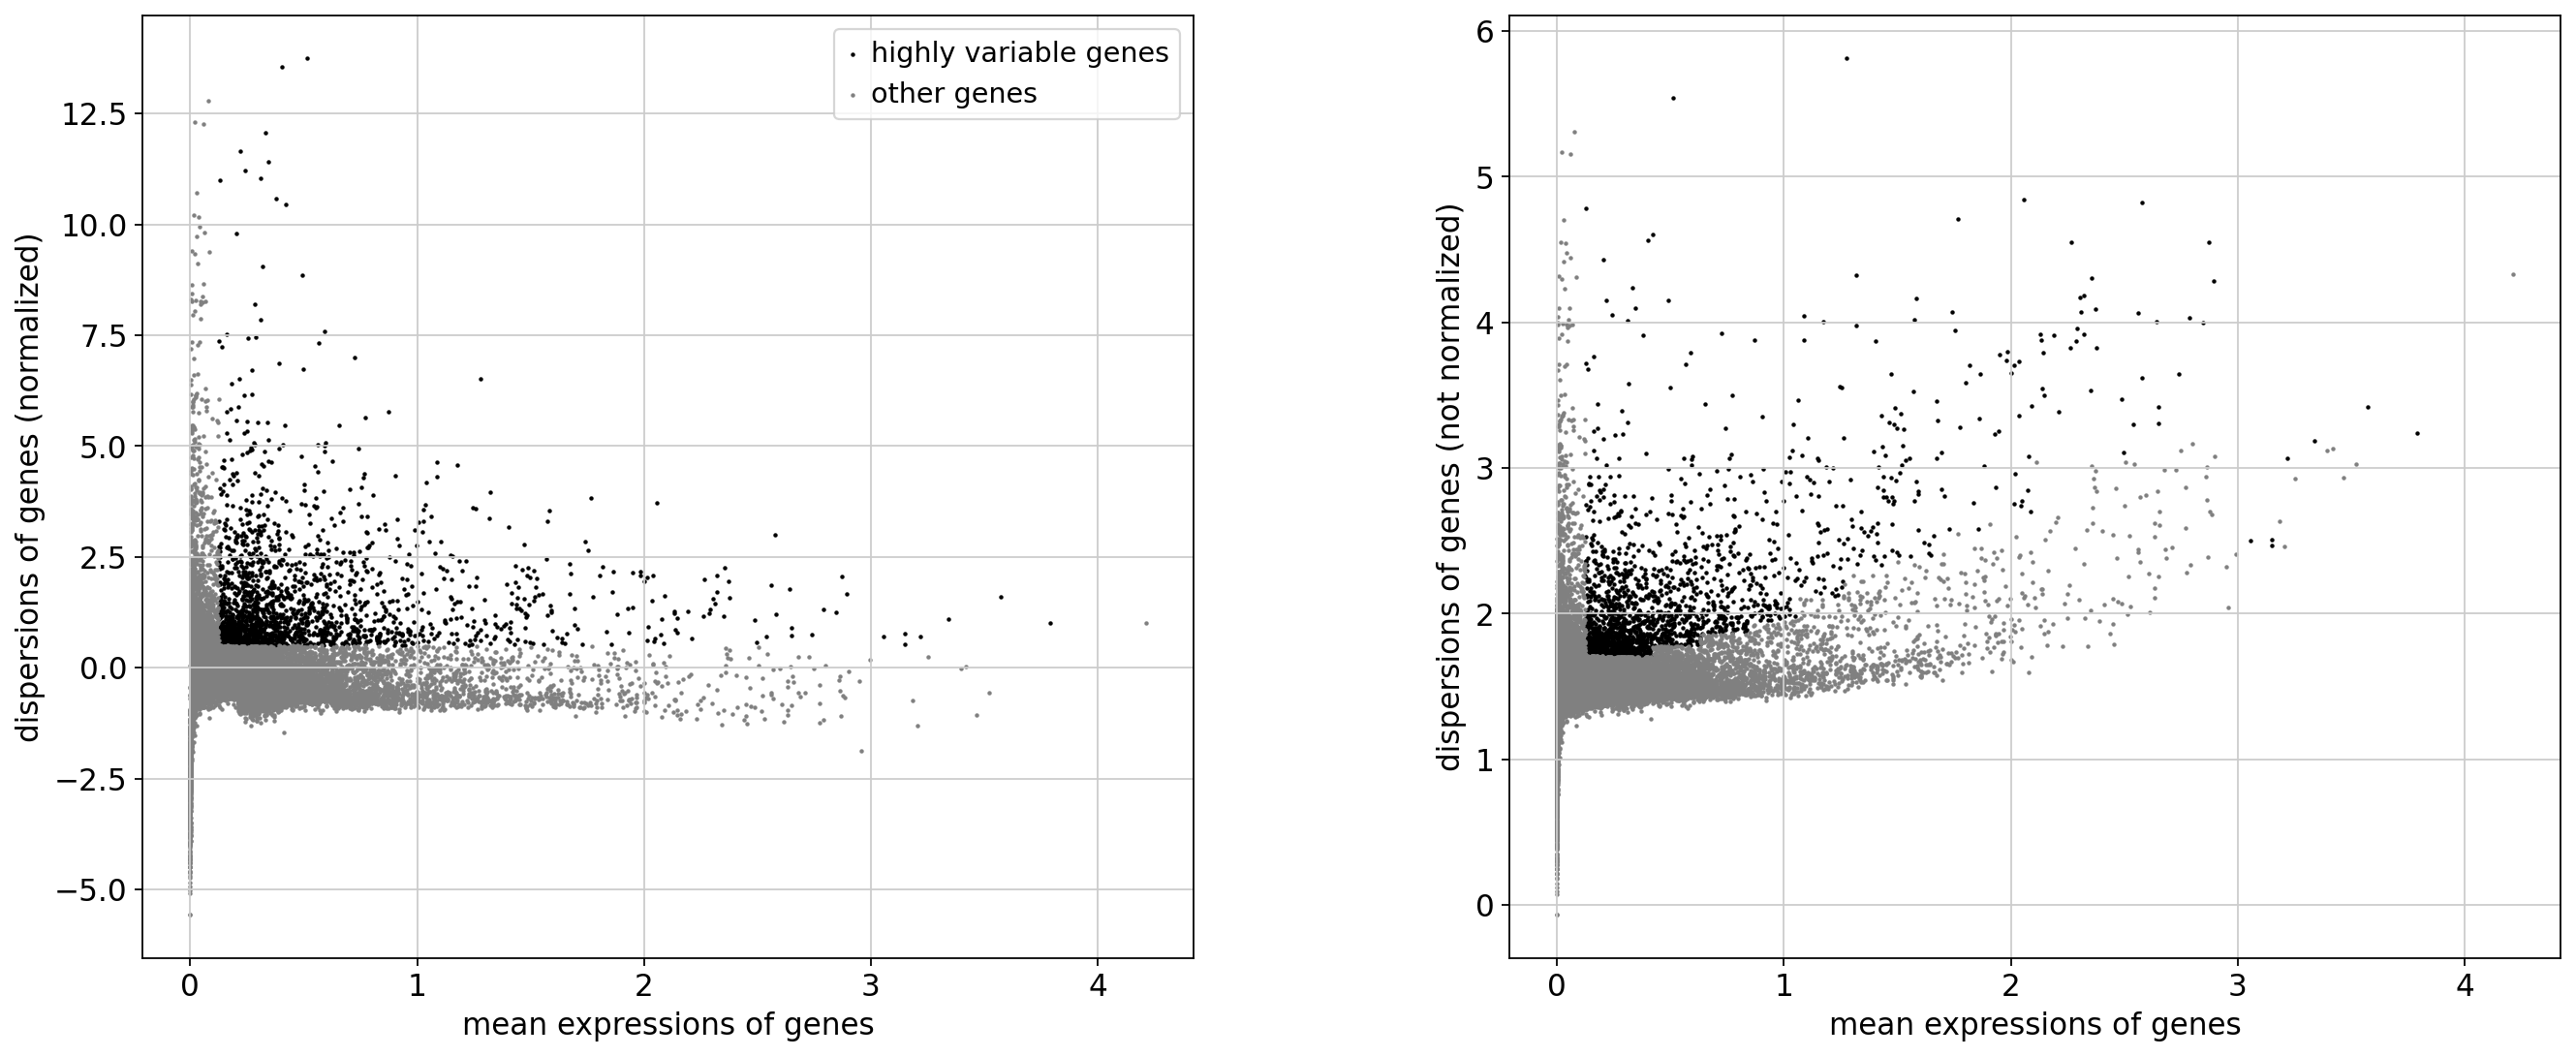

In [29]:
sc.pl.highly_variable_genes(single_cell_arabidopsis_root)


Next, we do standard preprocessing for clustering.

In [30]:
sc.tl.pca(single_cell_arabidopsis_root, svd_solver='arpack', random_state=303)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


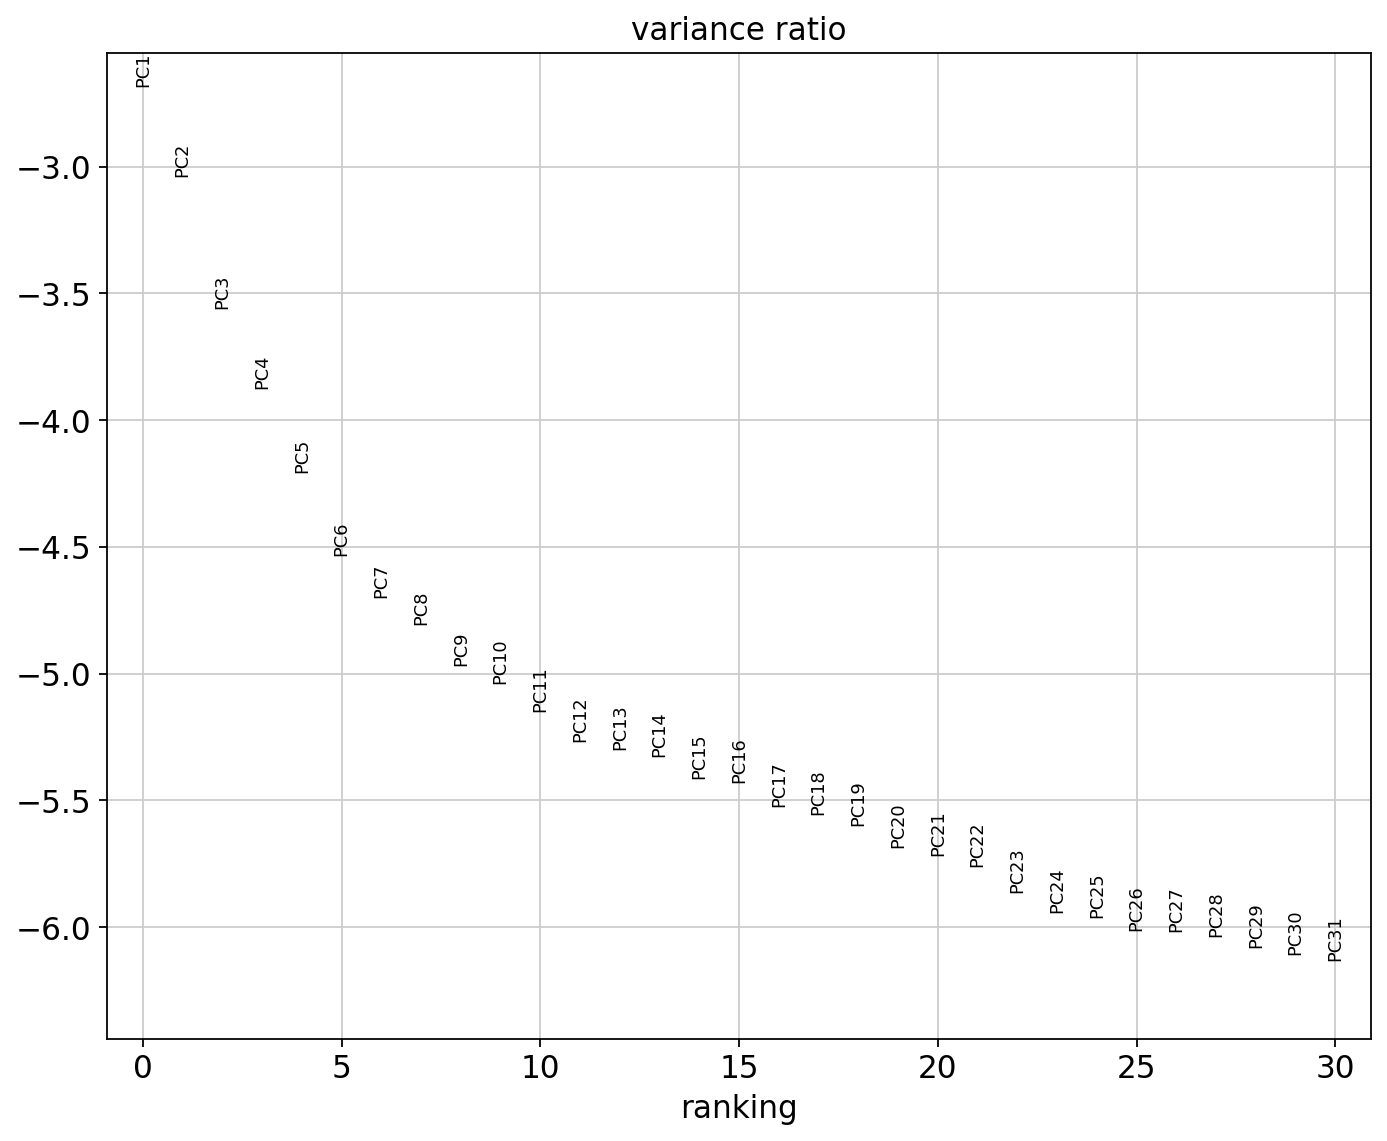

In [31]:
sc.pl.pca_variance_ratio(single_cell_arabidopsis_root, log=True)


In [32]:
sc.pp.neighbors(single_cell_arabidopsis_root, n_neighbors=12, n_pcs=50)


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:26)


In [33]:
sc.tl.umap(single_cell_arabidopsis_root, random_state = 142)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


In [34]:
single_cell_arabidopsis_root.obs

,orig.ident,nCount_RNA,nFeature_RNA,integrated_snn_res.1,seurat_clusters,CellType,n_genes
AAACCTGCAAACTGCT_1,Inflo1,1451,1114,6,6,6_meristem_boundary,1114
AAACCTGGTTACGTCA_1,Inflo1,4442,2468,4,4,4_S-phase,2468
AAACCTGTCCGCGTTT_1,Inflo1,1572,965,4,4,4_S-phase,965
AAACGGGAGATATGCA_1,Inflo1,1899,1304,0,0,0_cortex,1304
AAACGGGCATCCAACA_1,Inflo1,1485,1081,6,6,6_meristem_boundary,1081
...,...,...,...,...,...,...,...
TTTGTCACAGGGAGAG_3,Inflo3,1010,864,3,3,3_epidermis,864
TTTGTCACAGTATCTG_3,Inflo3,8164,2611,4,4,4_S-phase,2611
TTTGTCAGTGAAGGCT_3,Inflo3,5770,3148,0,0,0_cortex,3148
TTTGTCATCGAATCCA_3,Inflo3,2847,1912,0,0,0_cortex,1912


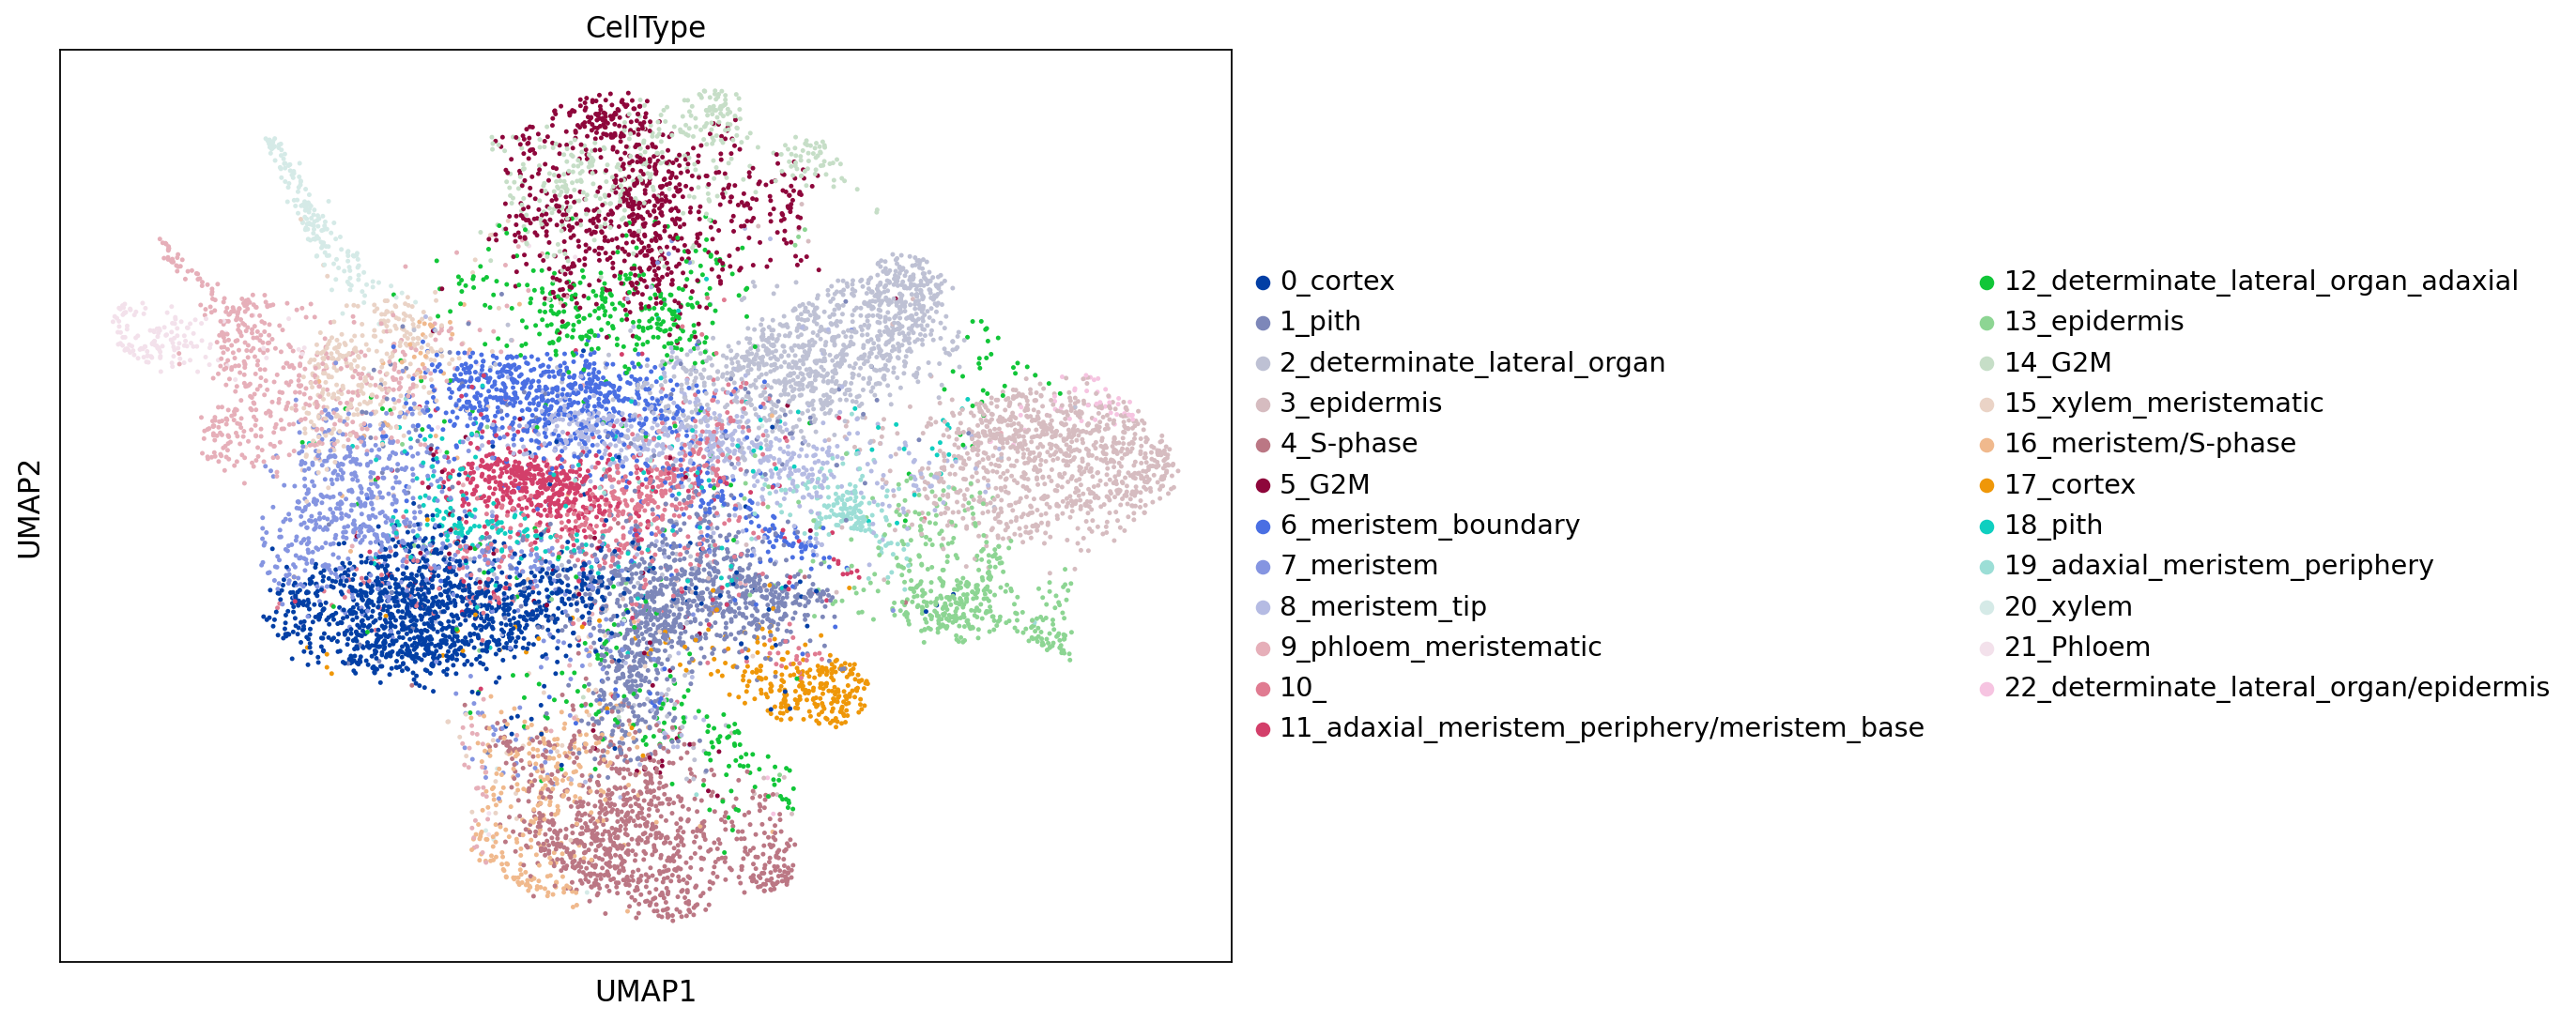

In [35]:
sc.pl.umap(single_cell_arabidopsis_root,color = 'CellType', s = 20)

Here, we majorly diverge from a standard clustering pipeline. We want to pick a resolution such that we have several hundred clusters, and that most clusters have low double digit numbers of cells. This resolution will probably be ridiculously high, in the 50-200 range. 

In [39]:
sc.tl.leiden(single_cell_arabidopsis_root,resolution = 80, random_state = 203)

running Leiden clustering
    finished: found 895 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


Check how many cells are in biggest and smallest clusters

In [40]:
single_cell_arabidopsis_root.obs['leiden'].value_counts().head(20)

0     43
1     41
2     39
3     38
4     37
5     36
6     35
7     35
8     34
9     34
10    34
13    33
12    33
11    33
14    32
15    32
16    31
17    31
18    31
19    31
Name: leiden, dtype: int64

In [41]:
single_cell_arabidopsis_root.obs['leiden'].value_counts().tail(20)

869    5
868    5
867    5
866    5
865    5
871    5
887    4
892    4
891    4
890    4
889    4
888    4
884    4
886    4
885    4
883    4
882    4
881    4
893    3
894    3
Name: leiden, dtype: int64

In [42]:
single_cell_arabidopsis_root

AnnData object with n_obs × n_vars = 13335 × 26259
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'integrated_snn_res.1', 'seurat_clusters', 'CellType', 'n_genes', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'CellType_colors', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Now, we are going to psuedobulk our samples, averaging expression within each tiny cluster

In [43]:
psuedobulk_df = pd.DataFrame(index = single_cell_arabidopsis_root.var_names)## Make a base dataframe index we will add stuff on to later
all_samples = list(single_cell_arabidopsis_root.obs.leiden.unique())  ## get list of clusters to loop through
psuedobulk_df

""
Zm00001eb026490
Zm00001eb056070
Zm00001eb055450
Zm00001eb053570
Zm00001eb004770
...
Zm00001eb412360
Zm00001eb438200
Zm00001eb440730
Zm00001eb440710


In [44]:
len(all_samples)

895

Below we actually do the psuedobulk.

In [45]:
for batch_type in all_samples:

    ## Read in the Names so our code is easy to understand
    current_cluster = batch_type

    ## Calculate the Psuedobulked mean
    cells_matching_batch_and_cluster = single_cell_arabidopsis_root[single_cell_arabidopsis_root.obs['leiden'] == current_cluster ]
    mean_of_genes = cells_matching_batch_and_cluster.X.mean(axis = 0).tolist()


    name_of_combo = current_cluster
    psuedobulk_df[name_of_combo] = mean_of_genes

/tmp/ipykernel_459153/3573879276.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  psuedobulk_df[name_of_combo] = mean_of_genes
/tmp/ipykernel_459153/3573879276.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  psuedobulk_df[name_of_combo] = mean_of_genes
/tmp/ipykernel_459153/3573879276.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fra

In [46]:
psuedobulk_df

,393,124,136,385,787,77,284,251,197,16,...,491,689,516,718,692,422,830,298,869,647
Zm00001eb026490,0.221487,0.000000,0.342023,0.153642,0.000000,0.263231,0.311162,0.000000,0.000000,0.109456,...,0.170568,0.000000,0.463672,0.143314,0.891929,0.116351,0.503573,0.326910,0.000000,0.000000
Zm00001eb056070,0.000000,0.047175,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119194,0.000000,...,0.148266,0.107479,0.000000,0.000000,0.109186,0.000000,0.000000,0.114094,0.000000,0.000000
Zm00001eb055450,0.000000,0.042229,0.237189,0.155986,0.204567,0.177809,0.179873,0.574354,0.119194,0.048267,...,0.000000,0.104378,0.000000,0.168630,0.108545,0.000000,0.000000,0.211427,0.197551,0.000000
Zm00001eb053570,0.137362,0.148839,0.000000,0.000000,0.000000,0.000000,0.388371,0.000000,0.000000,0.076103,...,0.000000,0.069375,0.810499,0.000000,0.000000,0.000000,0.000000,0.088352,0.301369,0.346304
Zm00001eb004770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078269,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001eb412360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.132724
Zm00001eb438200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zm00001eb440730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zm00001eb440710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
exp_data = psuedobulk_df

Next, we efficiently generate the spearman coexpression matrix, should be faster than .corr

In [48]:
import numpy as np
import scipy.stats as sci

rank_test_py_exp = sci.rankdata(exp_data, method = 'average', axis = 1)                #Row ranks
rank_test_py_exp = rank_test_py_exp - rank_test_py_exp.mean(axis = 1)[1]               #Center each gene, subtract mean rank
rank_test_py_exp_2 = np.square(rank_test_py_exp)                                       #Square
rank_test_py_exp = rank_test_py_exp /np.sqrt(rank_test_py_exp_2.sum(axis = 1))[:,None] #divide by sqrt(rowSums)
cr_python = np.dot(rank_test_py_exp, rank_test_py_exp.T)                               # Get correlations

In [49]:
cr_python

array([[ 1.        , -0.08260878,  0.05924203, ..., -0.02199628,
        -0.0312737 , -0.03899475],
       [-0.08260878,  1.        , -0.03918336, ..., -0.0207483 ,
         0.04624295,  0.09151102],
       [ 0.05924203, -0.03918336,  1.        , ..., -0.0563937 ,
        -0.00375111, -0.02694482],
       ...,
       [-0.02199628, -0.0207483 , -0.0563937 , ...,  1.        ,
        -0.00336322, -0.0047643 ],
       [-0.0312737 ,  0.04624295, -0.00375111, ..., -0.00336322,
         1.        , -0.0047643 ],
       [-0.03899475,  0.09151102, -0.02694482, ..., -0.0047643 ,
        -0.0047643 ,  1.        ]])

Put the results in a labeled dataframe, and this is your coexpression network!

In [50]:
corr_results = pd.DataFrame(columns = psuedobulk_df.index, index = psuedobulk_df.index, data = cr_python)
corr_results

,Zm00001eb026490,Zm00001eb056070,Zm00001eb055450,Zm00001eb053570,Zm00001eb004770,Zm00001eb036750,Zm00001eb013610,Zm00001eb027880,Zm00001eb022970,Zm00001eb048840,...,Zm00001eb406250,Zm00001eb408660,Zm00001eb423950,Zm00001eb427970,Zm00001eb412510,Zm00001eb412360,Zm00001eb438200,Zm00001eb440730,Zm00001eb440710,Zm00001eb442750
Zm00001eb026490,1.000000,-0.082609,0.059242,-0.080766,0.041823,-0.154811,0.078052,0.021532,0.015335,0.041534,...,-0.000663,0.028044,-0.027899,0.017457,0.021864,0.003343,0.090667,-0.021996,-0.031274,-0.038995
Zm00001eb056070,-0.082609,1.000000,-0.039183,0.102468,0.046416,-0.002364,-0.011198,0.101587,0.049181,0.050526,...,0.045565,-0.020748,0.023459,0.008623,-0.020748,0.032149,0.044354,-0.020748,0.046243,0.091511
Zm00001eb055450,0.059242,-0.039183,1.000000,0.040894,0.086323,0.009888,0.018392,0.112497,0.060868,0.021020,...,0.000120,0.071114,0.029410,0.036873,-0.006003,-0.045101,0.036664,-0.056394,-0.003751,-0.026945
Zm00001eb053570,-0.080766,0.102468,0.040894,1.000000,0.018475,0.139614,0.005751,0.039238,0.019293,0.006813,...,0.050260,0.024850,0.002469,0.000467,0.092054,0.026820,-0.020612,0.013838,0.021157,0.049598
Zm00001eb004770,0.041823,0.046416,0.086323,0.018475,1.000000,0.052413,0.055639,0.066403,0.084252,-0.013140,...,0.020357,-0.027382,0.044116,-0.003762,0.024893,-0.031636,0.016718,0.030775,0.027449,-0.038789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zm00001eb412360,0.003343,0.032149,-0.045101,0.026820,-0.031636,0.035753,0.020808,0.030325,-0.036552,0.000462,...,-0.003886,-0.003886,-0.004489,-0.005504,-0.003886,1.000000,-0.003886,-0.003886,-0.003886,-0.005504
Zm00001eb438200,0.090667,0.044354,0.036664,-0.020612,0.016718,-0.043853,0.041537,0.023793,-0.031637,-0.007048,...,-0.003363,-0.003363,-0.003886,-0.004764,-0.003363,-0.003886,1.000000,-0.003363,-0.003363,-0.004764
Zm00001eb440730,-0.021996,-0.020748,-0.056394,0.013838,0.030775,0.032035,0.022643,-0.020281,-0.031637,0.004080,...,-0.003363,-0.003363,-0.003886,-0.004764,-0.003363,-0.003886,-0.003363,1.000000,-0.003363,-0.004764
Zm00001eb440710,-0.031274,0.046243,-0.003751,0.021157,0.027449,-0.004777,-0.012359,0.036171,0.004058,0.031479,...,-0.003363,-0.003363,-0.003886,-0.004764,-0.003363,-0.003886,-0.003363,-0.003363,1.000000,-0.004764


Next, we need an orthology mapping of our data. It should be all many to many gene pairs, formatted into 5 columns. 


Species_1-OrthoDB Gene ID , Species_2-OrthoDB Gene ID, Orthogroup, Species_1 Gene ID Used in your single cell data,Species_2 Gene ID Used in your single cell data

Next, use the two following functions to generate the list, dropping in your data and the generated coexpression network/networks in the first function

In [ ]:
corr_results.to_csv('/data/passala/Generated_Tables/Sunil_root_shoot_project/shoot_corr_network.csv')

In [ ]:
def Calculate_Score_list_for_thresholding(orthology_map,species_1_coexpression_network,species_2_coexpression_network):
    import pandas as pd
    #Get Species Names in Common form 


    cross_species_n_m_genes = pd.read_csv(orthology_map)
    orig_column_common_name_1 = common_name_1 + ' Symbol'
    orig_column_common_name_2 = common_name_2 + ' Symbol'
    cross_species_n_m_genes = cross_species_n_m_genes.rename(columns = {orig_column_common_name_1:common_name_1,orig_column_common_name_2:common_name_2})
    ### Get one to ones
    cross_species_map_one_to_one = cross_species_n_m_genes.drop_duplicates(subset=common_name_1, keep= False,)
    cross_species_map_one_to_one = cross_species_map_one_to_one.drop_duplicates(subset= common_name_2, keep= False)

    ## Convert to Dictionary
    dictionary_mapper_one_to_two = cross_species_map_one_to_one.set_index(common_name_1).to_dict()[common_name_2]
    dictionary_mapper_dos_to_uno = cross_species_map_one_to_one.set_index(common_name_2).to_dict()[common_name_1]

    ## Read In Cococonets 
    coconet_species_one = species_1_coexpression_network
    coconet_species_two = species_2_coexpression_network

    cross_species_n_m_genes['Group ID'] = 'Unassigned'


    ## Assign Genes to Groups
    id_indexer = 0
    for gene_pair in cross_species_n_m_genes.iterrows():
        
        if gene_pair[1]['Group ID'] == 'Unassigned':
            current_species_1_gene = gene_pair[1][common_name_1]
            current_species_2_gene = gene_pair[1][common_name_2]
            cross_species_n_m_genes['Group ID'].loc[(cross_species_n_m_genes[common_name_1] == current_species_1_gene) & (cross_species_n_m_genes['Group ID'] == 'Unassigned')] = id_indexer
            cross_species_n_m_genes['Group ID'].loc[(cross_species_n_m_genes[common_name_2] == current_species_2_gene) & (cross_species_n_m_genes['Group ID'] == 'Unassigned')] = id_indexer

            all_labeled_groups = cross_species_n_m_genes.loc[cross_species_n_m_genes['Group ID'] == id_indexer]

            all_labeled_groups_species_1_genes = all_labeled_groups[common_name_1].to_list()
            all_labeled_groups_species_2_genes = all_labeled_groups[common_name_2].to_list()

            cross_species_n_m_genes['Group ID'].loc[cross_species_n_m_genes[common_name_1].isin(all_labeled_groups_species_1_genes)] = id_indexer
            cross_species_n_m_genes['Group ID'].loc[cross_species_n_m_genes[common_name_2].isin(all_labeled_groups_species_2_genes)] = id_indexer

            id_indexer += 1



    #Identify Pairs for evaluation
    all_pairs_to_evaluate_for_functional_conservation = pd.DataFrame(columns = [common_name_1,common_name_2,'Group Number'])
    for group_number in list(set(cross_species_n_m_genes['Group ID'].to_list())):
        current_gene_map = cross_species_n_m_genes.loc[cross_species_n_m_genes['Group ID'] == group_number]
        list_of_species_1_genes_in_group = list(set(current_gene_map[common_name_1].to_list()))
        list_of_species_2_genes_in_group = list(set(current_gene_map[common_name_2].to_list()))
        all_combo_list_current_genes = itertools.product(list_of_species_1_genes_in_group,list_of_species_2_genes_in_group)
        all_combo_list_current_genes = list(map(list,all_combo_list_current_genes))
        current_list_of_pairs = pd.DataFrame(all_combo_list_current_genes,columns = [common_name_1,common_name_2])
        current_list_of_pairs['Group Number'] = group_number
        all_pairs_to_evaluate_for_functional_conservation = all_pairs_to_evaluate_for_functional_conservation.append(current_list_of_pairs)



    all_pairs_to_evaluate_for_functional_conservation['Species 1 Score'] = np.nan
    all_pairs_to_evaluate_for_functional_conservation['Species 2 Score'] = np.nan


    ## Trim cococonets to match


    trimmed_species_1_cococonet = coconet_species_one[coconet_species_one.columns.intersection(cross_species_n_m_genes[common_name_1].to_list())]
    trimmed_species_1_cococonet = trimmed_species_1_cococonet[trimmed_species_1_cococonet.index.isin(cross_species_n_m_genes[common_name_1].to_list())]
    double_species_1_trimmed_cococonet = trimmed_species_1_cococonet[trimmed_species_1_cococonet.columns.intersection(cross_species_map_one_to_one[common_name_1].to_list())]
    double_species_1_trimmed_cococonet = double_species_1_trimmed_cococonet.replace(1,0)

    trimmed_species_2_cococonet = coconet_species_two[coconet_species_two.columns.intersection(cross_species_n_m_genes[common_name_2].to_list())]
    trimmed_species_2_cococonet = trimmed_species_2_cococonet[trimmed_species_2_cococonet.index.isin(cross_species_n_m_genes[common_name_2].to_list())]
    double_species_2_trimmed_cococonet = trimmed_species_2_cococonet[trimmed_species_2_cococonet.columns.intersection(cross_species_map_one_to_one[common_name_2].to_list())]
    double_species_2_trimmed_cococonet = double_species_2_trimmed_cococonet.replace(1,0)


    ## Rank
    species_1_cococonet_ranked = trimmed_species_1_cococonet.rank()
    species_2_cococonet_ranked = trimmed_species_2_cococonet.rank()

    #Do top 10 Genes
    top_10_species_1_genes = np.array(
        [double_species_1_trimmed_cococonet.T[c].nlargest(10).index.values for c in double_species_1_trimmed_cococonet.T]
    )  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
    top_10_species_1_genes_dataframe = pd.DataFrame(
        data=top_10_species_1_genes,
        index=double_species_1_trimmed_cococonet.index,
        columns=[
            "One",
            "Two",
            "Three",
            "Four",
            "Five",
            "Six",
            "Seven",
            "Eight",
            "Nine",
            "Ten",
        ],
    )

    #Convert 
    top_10_species_1_genes_as_species_2 = top_10_species_1_genes_dataframe.replace(to_replace=dictionary_mapper_one_to_two)

    # Get genes for checking 
    have_species_1_pairs = all_pairs_to_evaluate_for_functional_conservation.loc[all_pairs_to_evaluate_for_functional_conservation[common_name_1].isin(top_10_species_1_genes_as_species_2.index)]
    trimmed_all_gene_pairs_for_fc = have_species_1_pairs.loc[have_species_1_pairs[common_name_2].isin(trimmed_species_2_cococonet.index)]
    trimmed_all_gene_pairs_for_fc = trimmed_all_gene_pairs_for_fc.reset_index(drop = True)

    # Get values in species 2 
    for two_genes in trimmed_all_gene_pairs_for_fc.iterrows():
        current_species_1_gene = two_genes[1][common_name_1]
        current_species_2_gene = two_genes[1][common_name_2]
        finger_print_genes = top_10_species_1_genes_as_species_2.loc[current_species_1_gene].to_list()
        gene_ranks_in_species_2 = species_2_cococonet_ranked.loc[species_2_cococonet_ranked.index.isin(finger_print_genes), current_species_2_gene]
        avg_rank_in_species_2 = gene_ranks_in_species_2.mean()
        index_from_pairs = two_genes[0]
        trimmed_all_gene_pairs_for_fc.at[index_from_pairs, 'Species 1 Score'] = avg_rank_in_species_2

    #Repeat for Species 2 

    top_10_species_2_genes = np.array(
        [double_species_2_trimmed_cococonet.T[c].nlargest(10).index.values for c in double_species_2_trimmed_cococonet.T]
    )  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
    top_10_species_2_genes_dataframe = pd.DataFrame(
        data=top_10_species_2_genes,
        index=double_species_2_trimmed_cococonet.index,
        columns=[
            "One",
            "Two",
            "Three",
            "Four",
            "Five",
            "Six",
            "Seven",
            "Eight",
            "Nine",
            "Ten",
        ],
    )


    #convert 
    top_10_species_2_genes_as_species_1 = top_10_species_2_genes_dataframe.replace(to_replace=dictionary_mapper_dos_to_uno)


    # Get values in species 1 
    for two_genes in trimmed_all_gene_pairs_for_fc.iterrows():
        current_species_1_gene = two_genes[1][common_name_1]
        current_species_2_gene = two_genes[1][common_name_2]
        finger_print_genes = top_10_species_2_genes_as_species_1.loc[current_species_2_gene].to_list()
        gene_ranks_in_species_1 = species_1_cococonet_ranked.loc[species_1_cococonet_ranked.index.isin(finger_print_genes), current_species_1_gene]
        avg_rank_in_species_1 = gene_ranks_in_species_1.mean()
        index_from_pairs = two_genes[0]
        trimmed_all_gene_pairs_for_fc.loc[index_from_pairs, 'Species 2 Score'] = avg_rank_in_species_1

    #Caluclate Divisors 
    Number_of_species_1_genes = len(top_10_species_1_genes_as_species_2)
    Number_of_species_2_genes = len(top_10_species_2_genes_as_species_1)


    species_1_score_divisor = Number_of_species_2_genes - 4.5
    species_2_score_divisor = Number_of_species_1_genes-4.5

    #Divide and Average 
    trimmed_all_gene_pairs_for_fc['Species 1 Score'] = trimmed_all_gene_pairs_for_fc['Species 1 Score']/species_1_score_divisor
    trimmed_all_gene_pairs_for_fc['Species 2 Score'] = trimmed_all_gene_pairs_for_fc['Species 2 Score']/species_2_score_divisor
    trimmed_all_gene_pairs_for_fc['Total Score'] = trimmed_all_gene_pairs_for_fc[['Species 1 Score','Species 2 Score']].mean(axis = 1)

    return trimmed_all_gene_pairs_for_fc
    

For the second function, drop in the results of your first function as well as whatever thresholds you'd like to use. Below are the ones we recommmend. 


In [ ]:
lenient_threshold = ('lenient',0.7,0.8,0.02)
moderate_threshold = ('moderate',0.8,0.85,0.03)
stringent_threshold = ('stringent',0.85,0.9,0.035)

This funciton will return the coexpression proxies

In [ ]:
def Threshold_and_generate_coexpressalog_list(trimmed_all_gene_pairs_for_fc, single_pair_junk_threshold = .8, many_to_many_junk_threshold = .85,difference_between_many_to_drop = .03):
    
    
    list_of_true_pairs = []
    list_of_genes_to_average_and_set_to_be_equal = []


    common_name_1 = trimmed_all_gene_pairs_for_fc.columns[0]
    common_name_2 = trimmed_all_gene_pairs_for_fc.columns[1]

    for current_group in list(set(trimmed_all_gene_pairs_for_fc['Group Number'].to_list())):
        dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == current_group]
        dataframe_of_group = dataframe_of_group[[common_name_1,common_name_2,'Total Score']]
        wide_format = dataframe_of_group.pivot(index = common_name_1,columns= common_name_2,values= 'Total Score')
        if (wide_format<single_pair_junk_threshold).all(axis = None):
            continue
        elif wide_format.shape ==(0,0):
            continue
        elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
            one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format)>1 and len(wide_format.columns) ==1:
            one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format) == 1 and len(wide_format.columns)>1:
            one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
            list_of_true_pairs.append(one_true_pair)
        else:

            #Drop Low Quality Columns and Rows
            cols_to_drop = wide_format.columns[wide_format.max()<many_to_many_junk_threshold]
            wide_format = wide_format.drop(columns= cols_to_drop)
            rows_to_drop = wide_format.index[wide_format.max(axis = 1)<many_to_many_junk_threshold]
            wide_format = wide_format.drop(index= rows_to_drop)
            if (wide_format<single_pair_junk_threshold).all(axis = None):
                continue
            elif wide_format.shape ==(0,0):
                continue
            elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
                one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
                list_of_true_pairs.append(one_true_pair)
            elif len(wide_format)>1 and len(wide_format.columns) ==1:
                one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
                list_of_true_pairs.append(one_true_pair)
            elif len(wide_format) == 1 and len(wide_format.columns)>1:
                one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
                list_of_true_pairs.append(one_true_pair)
            elif (wide_format>.9).all(axis = None):
                ### Put in retention code here
                both_gene_lists_to_average = [wide_format.index.to_list(), wide_format.columns.to_list()]
                list_of_genes_to_average_and_set_to_be_equal.append(both_gene_lists_to_average)
                
            else:
                for cur_row in wide_format.iterrows():
                    cur_row_max = cur_row[1].max()
                    cur_row[1][cur_row[1]< cur_row_max - difference_between_many_to_drop] = np.nan
                    wide_format.loc[cur_row[0]] = cur_row[1]
                wide_format = wide_format.dropna(axis = 1, how = 'all')
                for cur_col in wide_format.columns:
                    cur_col_max = wide_format[cur_col].max()
                    wide_format[cur_col].loc[wide_format[cur_col]< cur_col_max-difference_between_many_to_drop] = np.nan
                wide_format = wide_format.dropna(axis = 0, how = 'all')
                col_count = wide_format.count() == 1
                wide_format = wide_format.loc[:,col_count]
                row_count = wide_format.count(axis = 1) ==1 
                wide_format = wide_format.loc[row_count,:]
                wide_format = wide_format.dropna(axis = 1, how = 'all')
                wide_format = wide_format.dropna(axis = 0, how = 'all')
                for label,content in wide_format.items():
                    cur_species_2_label = label
                    cur_species_1_label = content.idxmax()
                    if type(cur_species_1_label) == str:
                        one_true_pair = [cur_species_1_label,cur_species_2_label]
                        list_of_true_pairs.append(one_true_pair)


    true_pair_dataframe = pd.DataFrame(columns= [f'{common_name_1} gene',f'{common_name_2} gene'], data = list_of_true_pairs)
    true_pair_dataframe = true_pair_dataframe.drop_duplicates(subset = f'{common_name_1} gene')
    true_pair_dataframe = true_pair_dataframe.drop_duplicates(subset = f'{common_name_2} gene')
    
    return true_pair_dataframe
                

Below, is an example of what that workflow would look like 

In [ ]:
score_list_to_threshold = Calculate_Score_list_for_thresholding(orthology_map,species_1_coexpression_network,species_2_coexpression_network)
final_coexpression_proxies = Threshold_and_generate_coexpressalog_list(score_list_to_threshold)
print(final_coexpression_proxies)
final_coexpression_proxies.to_csv('save_where_you_want')